### Attempt 1: Chignolin, automatic assembly

In [1]:
from pyclops import ChemicalLossHandler
from pyclops.visualization.nglview import NGLViewVisualizer

In [3]:
chig_pdb = '/Users/bendupontjr/mphil_files/all_mphil_code/pyclops/examples/pdbs/chignolin.pdb'
clh = ChemicalLossHandler.from_pdb_file(chig_pdb, units_factor = 1.0)

print(clh.summary)

visualizer = NGLViewVisualizer(chig_pdb, units_factor = 1.0)

AmideAspHead [0, 2] (x2 resonance groups), AmideGluHead [0, 4] (x2 resonance groups), AmideHead2Tail [0, 9] (x2 resonance groups), AspCTerm [2, 9] (x4 resonance groups), AspGlu [2, 4] (x4 resonance groups), GluCTerm [4, 9] (x4 resonance groups)


In [4]:
loss = clh._chemical_losses[3]
print(loss.method)

visualizer.visualize_loss_atoms(loss, highlight_scale=0.6)

AmideGluHead


NGLWidget()

### Parsing a RDKit molecule

In [5]:
import MDAnalysis as mda
import MDAnalysis.converters.RDKitParser as RDKitParser
import rdkit.Chem as Chem

In [8]:
pdb_file = '/Users/bendupontjr/mphil_files/all_mphil_code/pyclops/examples/pdbs/chignolin.pdb'
mol = Chem.MolFromPDBFile(pdb_file, sanitize=True, removeHs=True)

#u = RDKitParser.RDKitParser(pdb_file)

mol.GetAtomWithIdx(5).GetPDBResidueInfo().GetResidueName()

#mol.GetAtomWithIdx(12).GetPDBResidueInfo().GetName().strip()

'TYR'

In [9]:
mol.GetAtomWithProp('resname')

AttributeError: 'Mol' object has no attribute 'GetAtomWithProp'

In [43]:
len(mol.GetAtoms())

93

### Testing the Structure Maker

In [1]:
from pyclops import ChemicalLossHandler
from pyclops.structure import StructureMaker

AttributeError: module 'pyclops.losses.amide_losses' has no attribute 'AmideOrnAsp'

In [4]:
cys_ala_5_cys_pdb = "/Users/bendupontjr/mphil_files/all_mphil_code/pyclops/examples/pdbs/CysAla5Cys.pdb"

chem_loss_handler = ChemicalLossHandler.from_pdb_file(cys_ala_5_cys_pdb, units_factor = 1.0)

print(chem_loss_handler.summary)

struct_mkr = StructureMaker(chem_loss_handler)

disulfide_loss = chem_loss_handler.chemical_losses[-1]

AmideHead2Tail [0, 6] (x2 resonance groups), CysCTerm [0, 6] (x2 resonance groups), Disulfide [0, 6]


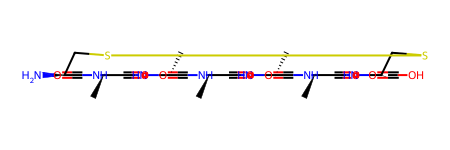

In [3]:
struct_mkr.make_structure(disulfide_loss)